# Logistic Regression

In [1]:
# import required modules 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#sigmoid function to create s curve line 
#as we know logistic regression cost function is sigmoid as we wants to binary 
#classification of our data 

def sigmoid(x):
    v=1/(1+np.exp(-x))
    return v
    

In [3]:
#make x and y x is indeoendet and y is dependent 

x=np.arange(-10,11)
y=sigmoid(x)

In [4]:
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
       9.99954602e-01])

In [5]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

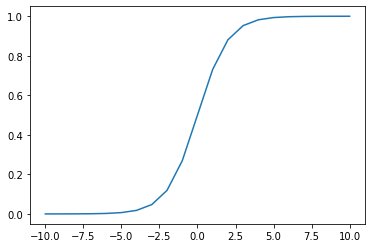

In [6]:
plt.plot(x,y)

plt.show()

In [7]:
# example of converting between probability and odds
from math import log
from math import exp
#define probability of success 
prob=0.8
print("Probability %.1f"%prob)
#convert given probbility to odds
odds=prob/(1-prob) # ps/pf
print("Odds %.1f"%odds)
#convert odds to probability 
prob=odds/(odds+1)
print("Probability %.1f"%prob)

Probability 0.8
Odds 4.0
Probability 0.8


In [8]:
'''insurance company data here we want to check either customer will claim 
   insurance or not so i can say it is binary classifier as per binary classifier 
   here we have eithe 1 or 0 1 means person will claim insurance 0 meanse not 
'''

'insurance company data here we want to check either customer will claim \n   insurance or not so i can say it is binary classifier as per binary classifier \n   here we have eithe 1 or 0 1 means person will claim insurance 0 meanse not \n'

In [9]:
df = pd.read_csv("data/insurance.csv")

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [12]:
#check either your data is balanced or not 
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [13]:
#split data
x=df.iloc[:,:-1] #all columns excluding last one 
y=df.iloc[:,-1] #last column 

In [14]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [15]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [16]:
#train test split 
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
# Baseline model of logistic regression
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [20]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
lr_score=lr.score(x_test,y_test)

In [22]:
y_pred=lr.predict(x_test)

In [23]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [24]:
y_test

559     1
1087    1
1020    1
460     0
802     0
       ..
323     1
1268    1
134     1
1274    1
876     0
Name: insuranceclaim, Length: 402, dtype: int64

In [25]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [27]:
accuracy_score(y_test,y_pred)

0.8034825870646766

In [28]:
precision_score(y_test,y_pred)

0.8192307692307692

In [29]:
recall_score(y_test,y_pred)

0.8693877551020408

In [30]:
f1_score(y_test,y_pred)

0.8435643564356436

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.80      0.80       402



In [33]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [34]:
print(tp,fp)
print(fn,tn)

213 47
32 110


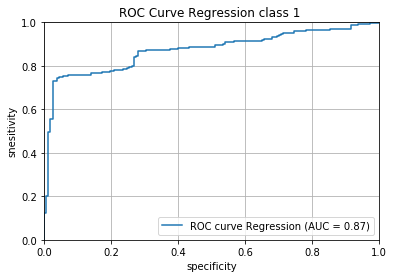

In [38]:
from sklearn.metrics import roc_curve,auc
pred_prob=lr.predict_proba(x_test)[:,1]
#pred_prob # create new df in that keep age and its respective probability 
fpr0,tpr0,thresholds0=roc_curve(y_test,pred_prob)
roc_auc0=auc(fpr0,tpr0)
plt.plot(fpr0,tpr0,label='ROC curve Regression (AUC = %0.2f)' % roc_auc0)
plt.xlim([0.0,1])
plt.ylim([0.0,1])
plt.title("ROC Curve Regression class 1 ")
plt.xlabel("specificity")
plt.ylabel('snesitivity')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [39]:
df["charges"].value_counts()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

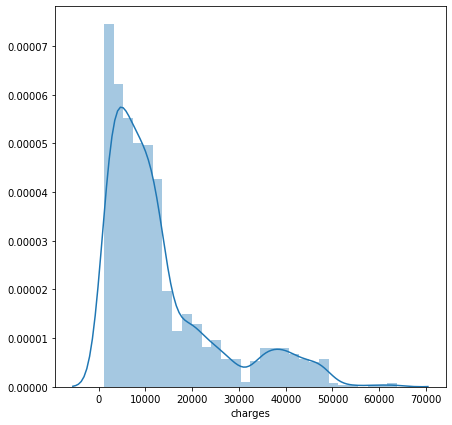

In [40]:
plt.figure(figsize=(7,7))
sns.distplot(df["charges"])
plt.show()

In [41]:
x["charges"]=np.sqrt(x["charges"])

In [42]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,129.942002
1,18,1,33.770,1,0,2,41.539768
2,28,1,33.000,3,0,2,66.704288
3,33,1,22.705,0,0,1,148.271611
4,32,1,28.880,0,0,1,62.184043
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,102.958964
1334,18,0,31.920,0,0,0,46.967870
1335,18,0,36.850,0,0,2,40.371196
1336,21,0,25.800,0,0,3,44.810099


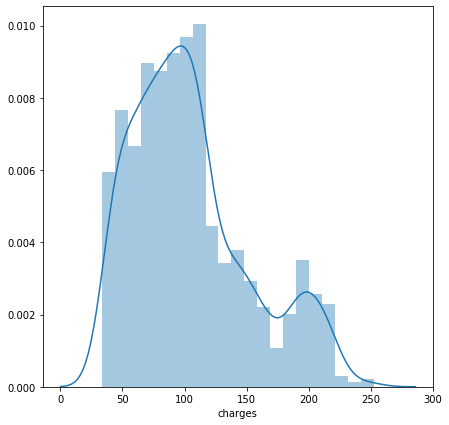

In [43]:
plt.figure(figsize=(7,7))
sns.distplot(x["charges"])
plt.show()

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [45]:
#threashold C=0.5
lr1=LogisticRegression(C=0.5)
lr1.fit(x_train,y_train)
print(lr1.score(x_test,y_test))

0.8606965174129353


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
y_pred=lr1.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.89      0.89      0.89       245

    accuracy                           0.86       402
   macro avg       0.85      0.85      0.85       402
weighted avg       0.86      0.86      0.86       402



In [48]:
lr1_score=lr1.score(x_test,y_test)

In [49]:
lr1_score 

0.8606965174129353

In [50]:
lr_score

0.8034825870646766

# AUC & ROC

In [51]:
from sklearn.metrics import roc_curve,auc
x_test

,age,sex,bmi,children,smoker,region,charges
559,19,1,35.530,0,0,1,40.576221
1087,57,1,31.540,0,0,1,106.551526
1020,51,1,37.000,0,0,3,93.800816
460,49,0,36.630,3,0,2,101.889542
802,21,1,22.300,1,0,3,45.859350
...,...,...,...,...,...,...,...
323,57,1,40.945,0,0,0,107.546737
1268,20,0,33.300,0,0,3,43.364582
134,20,0,28.785,0,0,0,49.570265
1274,26,1,27.060,0,1,2,130.550149


In [52]:
pred_prob=lr1.predict_proba(x_test)[:,1]

In [53]:
pred_prob # create new df in that keep age and its respective probability 

array([0.86250757, 0.83468009, 0.91632207, 0.22322675, 0.17042063,
       0.7942533 , 0.51887297, 0.76380767, 0.59583418, 0.9708535 ,
       0.62009233, 0.83908531, 0.29043955, 0.4479662 , 0.83213766,
       0.23703157, 0.53891439, 0.05205331, 0.80802886, 0.87224982,
       0.86658376, 0.89328884, 0.70838558, 0.65993565, 0.73087194,
       0.42859746, 0.05674554, 0.85844349, 0.2963004 , 0.58128379,
       0.74586076, 0.14993236, 0.36520659, 0.98862586, 0.47386345,
       0.59359542, 0.99372624, 0.16600511, 0.94611179, 0.9622877 ,
       0.29377501, 0.89108957, 0.07128084, 0.78620055, 0.08140316,
       0.80190807, 0.72806011, 0.98858627, 0.34177683, 0.0266508 ,
       0.83763817, 0.24121972, 0.48253037, 0.04217326, 0.91251293,
       0.96817939, 0.75570437, 0.90125753, 0.11615827, 0.95342251,
       0.87488192, 0.88331907, 0.92702874, 0.66597958, 0.92940104,
       0.60749599, 0.07225386, 0.32964247, 0.24494324, 0.92019851,
       0.83881086, 0.98983622, 0.67075519, 0.04122872, 0.80647

In [54]:
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

In [55]:
roc_auc=auc(fpr,tpr)

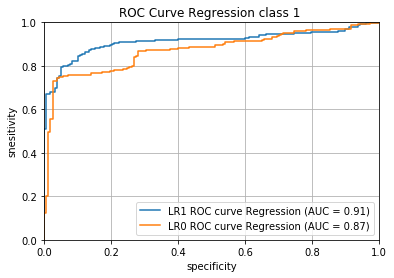

In [56]:
plt.plot(fpr,tpr,label='LR1 ROC curve Regression (AUC = %0.2f)' % roc_auc)
plt.plot(fpr0,tpr0,label='LR0 ROC curve Regression (AUC = %0.2f)' % roc_auc0)
plt.xlim([0.0,1])
plt.ylim([0.0,1])
plt.title("ROC Curve Regression class 1 ")
plt.xlabel("specificity")
plt.ylabel('snesitivity')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
note : 
    ROC and AUC is usefull in all type of classification algorithms 
    it is uses confusion metrics 
    here it plots sensitivity vs specificity 
    it takes all possible thresholds values and calculate tPR and fpr of each possible data given into
    y_test on based y_test brobability given by lr model 
    it helps us to observe our model accuracy in graphical form 
    